In [1]:
import seaborn as sns

In [2]:
sns.set()

In [3]:
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


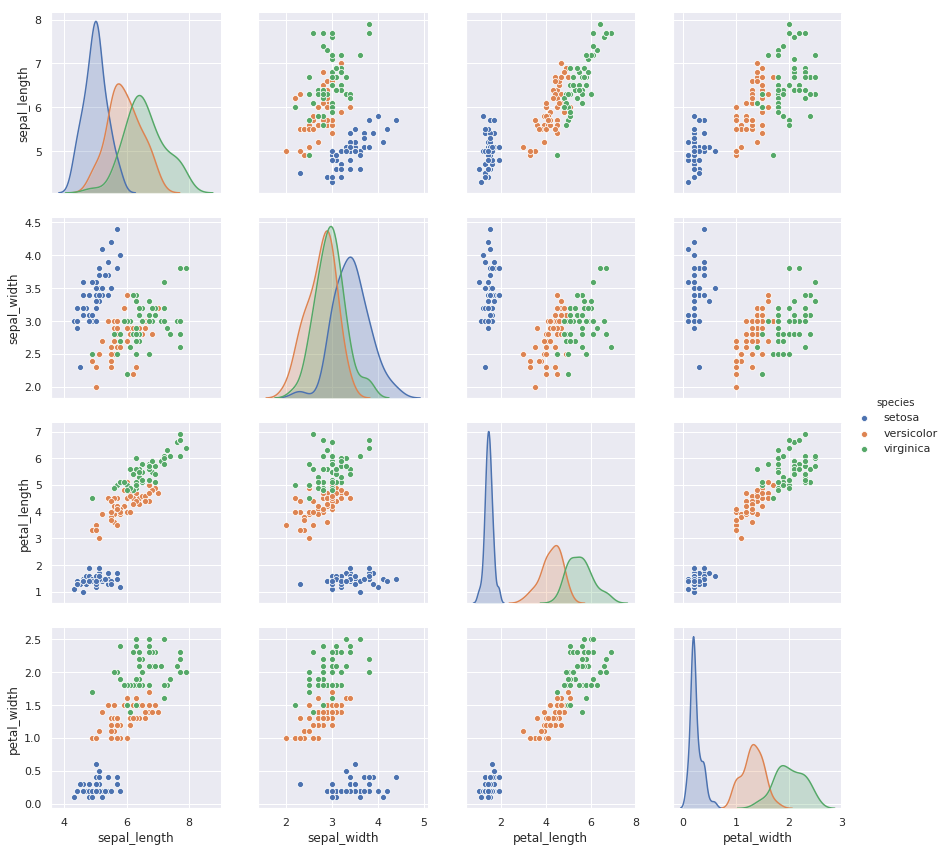

In [8]:
sns.pairplot(iris, hue='species', height=3)

In [9]:
X_iris = iris.drop('species', axis=1)
X_iris.shape

(150, 4)

In [11]:
y_iris = iris['species']
y_iris.shape

(150,)

## 例：単回帰

In [14]:
import matplotlib.pyplot as plt
import numpy as np

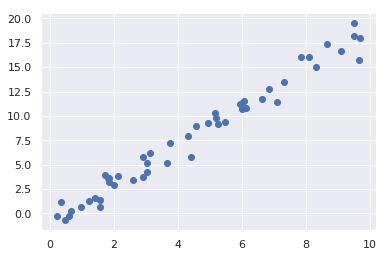

In [26]:
rng = np.random.RandomState(42)
x = 10 * rng.rand(50)
y = 2 * x - 1 + rng.randn(50)
plt.scatter(x, y);

In [34]:
from sklearn.linear_model import LinearRegression

In [35]:
model = LinearRegression(fit_intercept=True)
model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [36]:
X = x[:, np.newaxis]
X.shape

(50, 1)

In [37]:
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [38]:
# 傾き
model.coef_

array([1.9776566])

In [39]:
# 切片
model.intercept_

-0.9033107255311146

In [40]:
xfit = np.linspace(-1, 11)

In [41]:
Xfit = xfit[:, np.newaxis]
yfit = model.predict(Xfit)

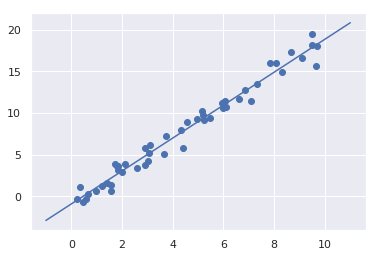

In [42]:
plt.scatter(x, y)
plt.plot(xfit, yfit)

# irisの分類(ナイーブベイズ)

In [43]:
from sklearn.model_selection import train_test_split

Xtrain, Xtest, ytrain, ytest = train_test_split(X_iris, y_iris, random_state=1)

In [44]:
from sklearn.naive_bayes import GaussianNB

In [45]:
model = GaussianNB()
model.fit(Xtrain, ytrain)
y_model = model.predict(Xtest)

In [46]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest, y_model)

0.9736842105263158

## irisの次元数

In [48]:
from sklearn.decomposition import PCA

In [49]:
model = PCA(n_components=2)
model.fit(X_iris)
X_2D = model.transform(X_iris) 

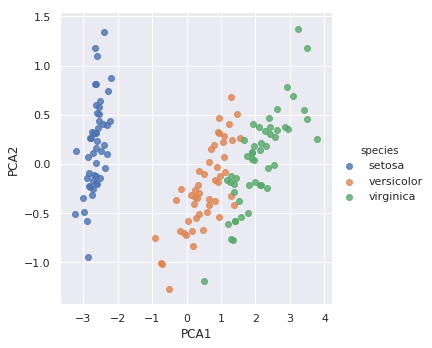

In [51]:
iris['PCA1'] = X_2D[:, 0]
iris['PCA2'] = X_2D[:, 1]
sns.lmplot('PCA1', 'PCA2', hue='species', data=iris, fit_reg=False)

## iris クラスタリング

In [52]:
from sklearn.mixture import GaussianMixture

In [53]:
model = GaussianMixture(n_components=3, covariance_type='full')
model.fit(X_iris)
y_gmm = model.predict(X_iris)

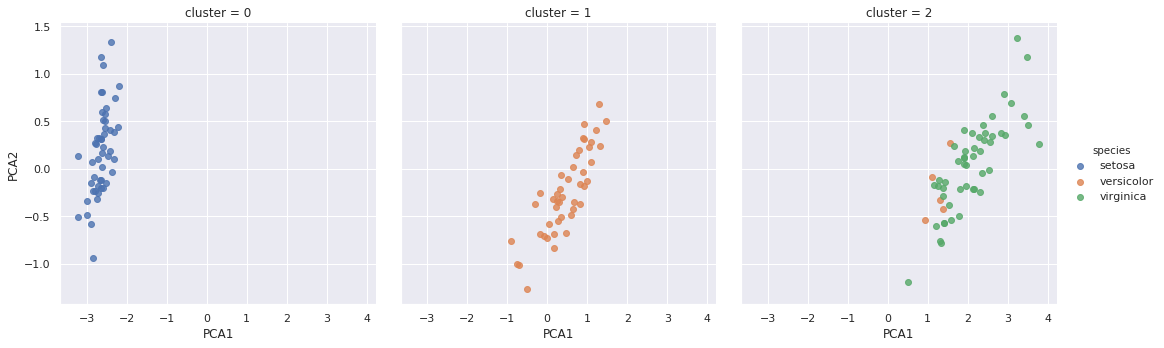

In [58]:
iris['cluster'] = y_gmm
sns.lmplot('PCA1', 'PCA2', data=iris, hue='species', col='cluster', fit_reg=False)

## 手書き数字の調査

In [59]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.images.shape

(1797, 8, 8)

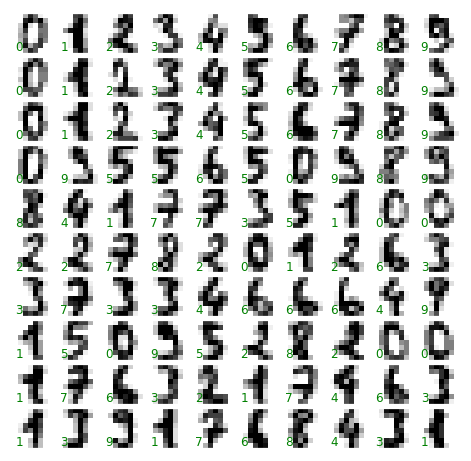

In [63]:
fig ,axes = plt.subplots(10, 10, figsize=(8, 8),
                                        subplot_kw={'xticks': [], 'yticks': []},
                                        gridspec_kw={'hspace': 0.1, 'wspace': 0.1})

for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap='binary', interpolation='nearest')
    ax.text(0.05, 0.05, str(digits.target[i]), transform=ax.transAxes, color='green')

In [64]:
X = digits.data
X.shape

(1797, 64)

In [65]:
y = digits.target
y.shape

(1797,)

## 教師なし学習　次元削除

In [66]:
from sklearn.manifold import Isomap

In [67]:
iso = Isomap(n_components=2)
iso.fit(digits.data)
data_projected = iso.transform(digits.data)
data_projected.shape

(1797, 2)

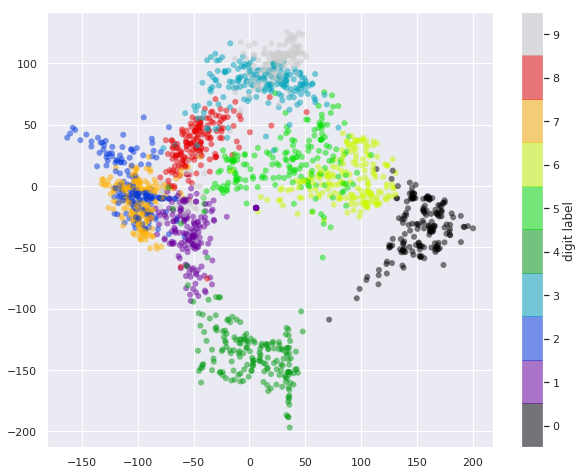

In [85]:
plt.figure(figsize=(10, 8))
plt.scatter(data_projected[:, 0], data_projected[:, 1], c=digits.target,
                   edgecolor='none', alpha=0.5, cmap=plt.cm.get_cmap('nipy_spectral', 10))
plt.colorbar(label='digit label', ticks=range(10))
plt.clim(-0.5, 9.5)

In [86]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state=0)

In [87]:
from sklearn.naive_bayes import GaussianNB

In [88]:
model = GaussianNB()
model.fit(Xtrain, ytrain)
y_model = model.predict(Xtest)

In [89]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest, y_model)

0.8333333333333334

In [90]:
from sklearn.metrics import confusion_matrix

Text(54.260000000000005, 0.5, 'true value')

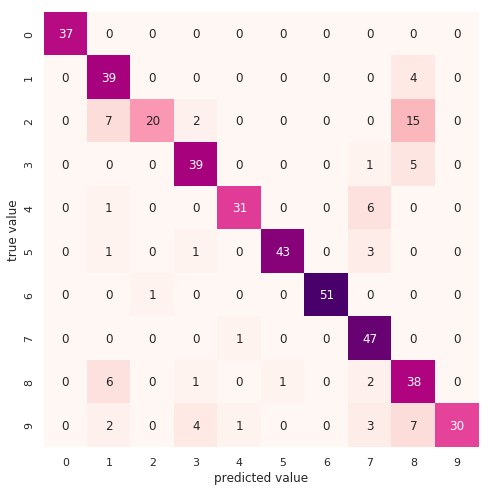

In [91]:
mat = confusion_matrix(ytest, y_model)

plt.figure(figsize=(8,8))
sns.heatmap(mat, square=True, annot=True, cbar=False, cmap='RdPu')
plt.xlabel('predicted value')
plt.ylabel('true value')

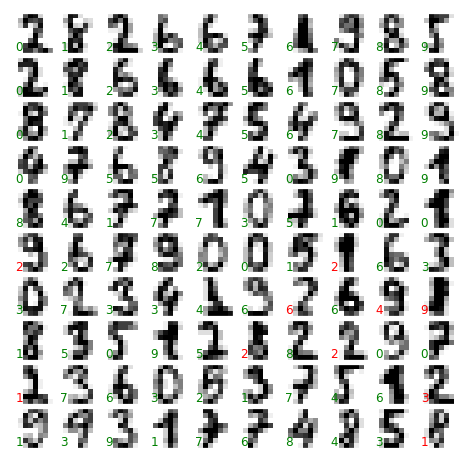

In [98]:
fig, axes = plt.subplots(10, 10, figsize=(8, 8),
                                        subplot_kw={'xticks': [], 'yticks': []},
                                        gridspec_kw=dict(hspace=0.1, wspace=0.1))

test_images = Xtest.reshape(-1, 8, 8)

for i, ax in enumerate(axes.flat):
    ax.imshow(test_images[i], cmap='binary', interpolation='nearest')
    ax.text(0.05, 0.05, str(digits.target[i]), transform=ax.transAxes, color='green' if (ytest[i] == y_model[i]) else 'red')